In [99]:
from sklearn.datasets import make_blobs
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import random
import math
import numpy as np
import math
import os
import imageio.v2 as imageio
from IPython.display import Image


# gera pontos de forma aleatória e separa em duas listas
X, _ = make_blobs(n_samples=2000, centers=4, cluster_std=2)
x1 = []
x2 = []
for x in X:
    x1.append(tuple(x)[0])
    x2.append(tuple(x)[1])


# inicialização dos centróides
c1 = (random.randint(math.floor(np.min(x1)), math.floor(np.max(x1))), random.randint(math.floor(np.min(x2)), math.floor(np.max(x2))))
c2 = (random.randint(math.floor(np.min(x1)), math.floor(np.max(x1))), random.randint(math.floor(np.min(x2)), math.floor(np.max(x2))))
plt.scatter(x=x1, y=x2, s=2)
plt.scatter(x=c1[0], y=c1[1], marker='X', s=50, c='red')
plt.scatter(x=c2[0], y=c2[1], marker='X', s=50, c='red')
plt.show()

/tmp/ipykernel_18681/1090464531.py:29: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [100]:
# configuração para o matplotlib não plotar os gráficos
matplotlib.use('Agg')

# criação dos clusters vazios (sem pontos)
cluster_c1 = []
cluster_c2 = []

# lista com os nomes dos arquivos
names = []

for i in range(20):
    # salva os gráficos em imagens para criar um gif
    fig, ax = plt.subplots()
    ax.scatter(x=x1, y=x2, s=2)
    ax.scatter(x=c1[0], y=c1[1], marker='X', s=50, c='red')
    ax.scatter(x=c2[0], y=c2[1], marker='X', s=50, c='red')
    fig.savefig(f'images/{i + 1}.png')
    names.append(f'{i + 1}.png')

    # calcula a distancia dos pontos em relação aos centróides
    sum_c1 = 0
    for j in range(len(x1)):
        P = (x1[j], x2[j])

        c1_distance = math.sqrt(math.pow(P[0] - c1[0], 2) + math.pow(P[1] - c1[1], 2))
        c2_distance = math.sqrt(math.pow(P[0] - c2[0], 2) + math.pow(P[1] - c2[1], 2))
        
        if c1_distance > c2_distance:
            cluster_c2.append(P)
        else:
            cluster_c1.append(P)
            sum_c1 += c1_distance
    
    # atualiza a posição de c1
    sum_x1 = 0
    sum_x2 = 0
    for i in range(len(cluster_c1)):
        sum_x1 = sum_x1 + cluster_c1[i][0]
        sum_x2 = sum_x2 + cluster_c1[i][1]
    if len(cluster_c1) != 0:
        c1 = (sum_x1 / len(cluster_c1), sum_x2 / len(cluster_c1))
 
    # atualiza a posição de c2
    sum_x1 = 0
    sum_x2 = 0
    for i in range(len(cluster_c2)):
        sum_x1 = sum_x1 + cluster_c2[i][0]
        sum_x2 = sum_x2 + cluster_c2[i][1]
    if len(cluster_c2) != 0:
        c2 = (sum_x1 / len(cluster_c2), sum_x2 / len(cluster_c2))
    
    # se os centróides não se moveram, para o looping

In [101]:
path = 'images/'
extension = '.png'
duration = 5

# cria uma lista de imagens
images = []
for image in names:
    image_path = os.path.join(path, image)
    images.append(imageio.imread(image_path))

# cria o gif
output_path = os.path.join('.', "output.gif")
imageio.mimsave(output_path, images, duration=duration)

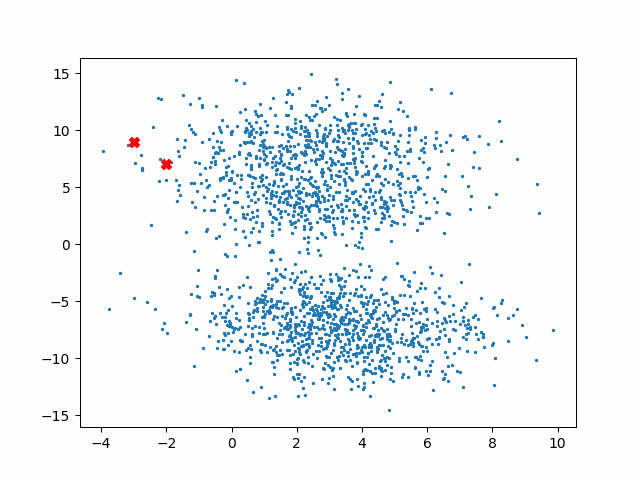

In [103]:
# abre o gif
Image(filename='./output.gif')